#Implement Decision Tree Classifier for classification of Iris dataset

In [60]:
#a.Load the Data set
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

data = pd.read_csv('iris.csv')
data.head()


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


##b. Split the data set to train and test sets

In [61]:
x=data[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]
y=data['Species']


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

##c. Training Decision Tree

In [62]:
tree = DecisionTreeClassifier(criterion='entropy')
tree = tree.fit(x_train,y_train)

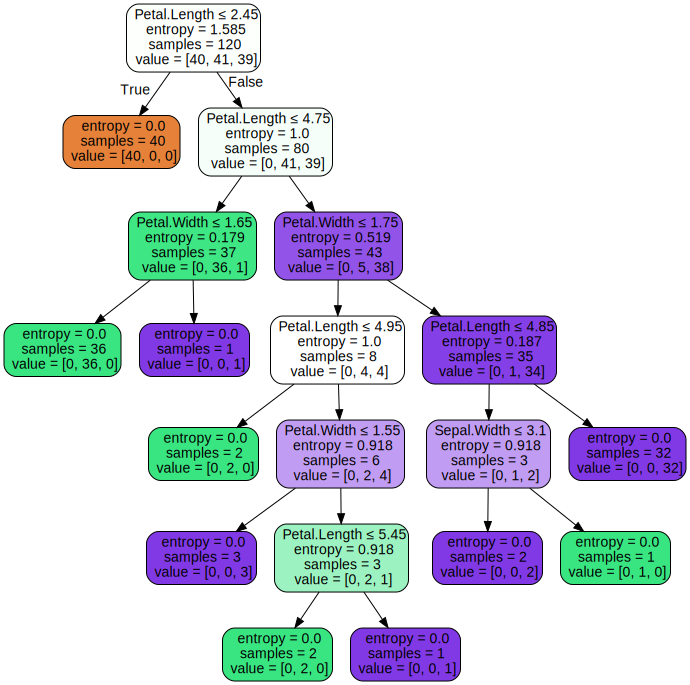

In [63]:
from sklearn.tree import export_graphviz
import graphviz

dot_data=export_graphviz(tree,out_file=None)
graph=graphviz.Source(dot_data)

dot_data = export_graphviz(tree,out_file=None,feature_names=x.columns,filled=True,rounded=True,special_characters=True)
graph=graphviz.Source(dot_data)
graph


##d.Accuracy and Confusion Matrix

In [64]:
y_pred = tree.predict(x_test)

print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : \n",matrix)


Accuracy:  1.0
Confusion Matrix : 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


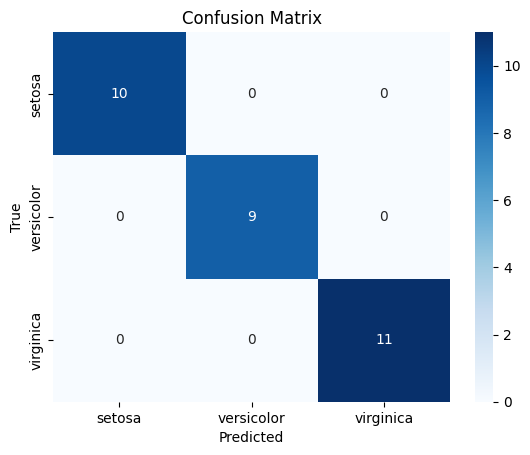

In [67]:
#Plotting the confusion matrix
import matplotlib.pyplot as plt

sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues",
xticklabels = iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()